# Hot Plasma Composition Analyzer (HPCA)

This notebook shows how to load and plot MMS HPCA data with pySPEDAS and pyTplot

For information on the data, please see the Data Products Guide at:

https://lasp.colorado.edu/mms/sdc/public/datasets/hpca/

This command sets up the PySPEDAS environment when running in Google Colab.  You can skip it or comment it out if you're running this notebook in an environment that already has PySPEDAS installed.


In [ ]:
!pip install pyspedas

## Get started

In [ ]:
from pyspedas.projects.mms import hpca
from pyspedas import mms_hpca_calc_anodes
from pyspedas import mms_hpca_spin_sum
from pyspedas import tplot

## Load burst mode moments data

In [2]:
hpca_vars = hpca(trange=['2015-10-16/13:05', '2015-10-16/13:10'], data_rate='brst', center_measurement=True)

08-Dec-23 11:14:03: Downloading mms1_hpca_brst_l2_moments_20151016130334_v4.1.0.cdf to pydata/mms1/hpca/brst/l2/moments/2015/10/16
08-Dec-23 11:14:03: Downloading mms1_hpca_brst_l2_moments_20151016130524_v4.1.0.cdf to pydata/mms1/hpca/brst/l2/moments/2015/10/16
08-Dec-23 11:14:04: Downloading mms1_hpca_brst_l2_moments_20151016130904_v4.1.0.cdf to pydata/mms1/hpca/brst/l2/moments/2015/10/16
08-Dec-23 11:14:05: Loaded variables:
08-Dec-23 11:14:05: Epoch
08-Dec-23 11:14:05: Epoch_MINUS
08-Dec-23 11:14:05: Epoch_PLUS
08-Dec-23 11:14:05: mms1_hpca_spin_number
08-Dec-23 11:14:05: mms1_hpca_ion_energy
08-Dec-23 11:14:05: mms1_hpca_sweep_table_number
08-Dec-23 11:14:05: mms1_hpca_science_mode
08-Dec-23 11:14:05: mms1_hpca_hplus_number_density
08-Dec-23 11:14:05: mms1_hpca_hplus_ion_bulk_velocity
08-Dec-23 11:14:05: mms1_hpca_hplus_scalar_temperature
08-Dec-23 11:14:05: mms1_hpca_hplus_ion_pressure
08-Dec-23 11:14:05: mms1_hpca_hplus_temperature_tensor
08-Dec-23 11:14:05: mms1_hpca_heplus_numb

## Plot the H+, O+ and He+ density

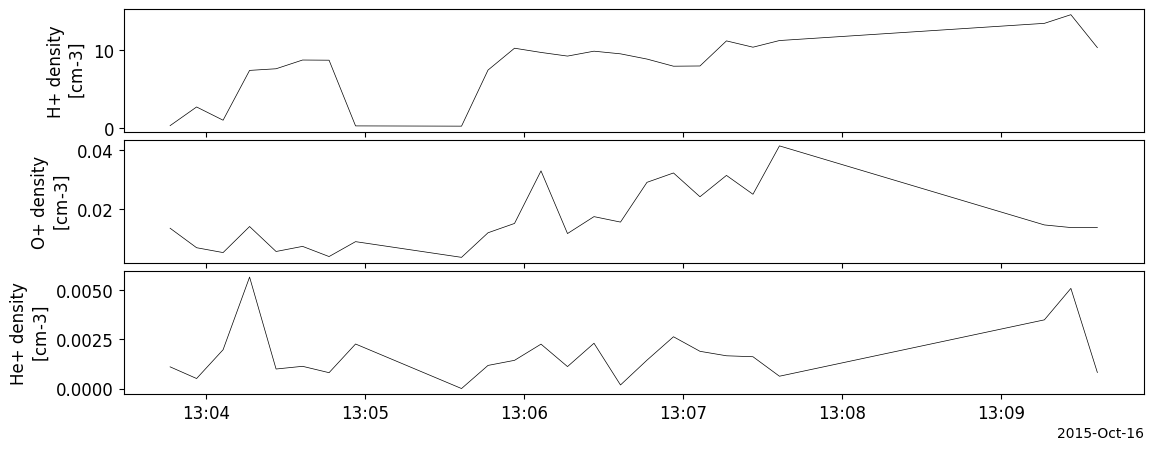

In [3]:
tplot(['mms1_hpca_hplus_number_density', 
        'mms1_hpca_oplus_number_density', 
        'mms1_hpca_heplus_number_density'])

## Plot the H+, O+ and He+ temperature

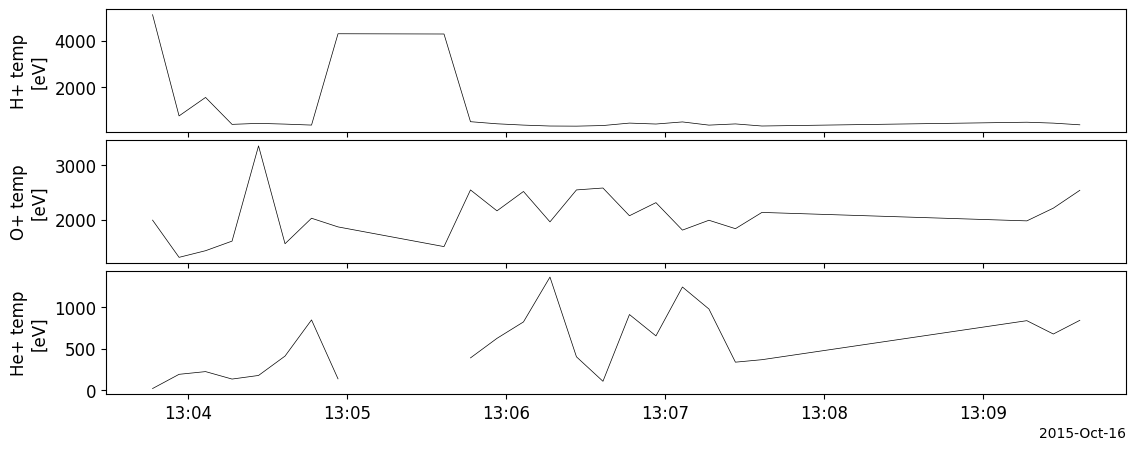

In [4]:
tplot(['mms1_hpca_hplus_scalar_temperature', 
        'mms1_hpca_oplus_scalar_temperature', 
        'mms1_hpca_heplus_scalar_temperature'])

## Plot the H+, O+ and He+ flow velocity

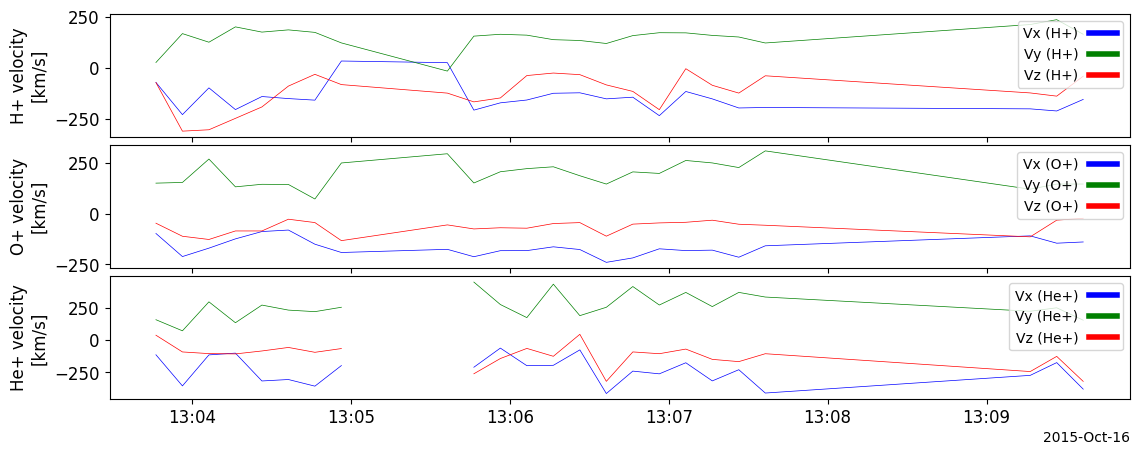

In [5]:
tplot(['mms1_hpca_hplus_ion_bulk_velocity', 
        'mms1_hpca_oplus_ion_bulk_velocity', 
        'mms1_hpca_heplus_ion_bulk_velocity'])

## Load burst mode ion flux data

In [6]:
ion_vars = hpca(trange=['2015-10-16/13:05', '2015-10-16/13:07'], datatype='ion', data_rate='brst', center_measurement=True)

08-Dec-23 11:14:08: Downloading mms1_hpca_brst_l2_ion_20151016130334_v4.1.0.cdf to pydata/mms1/hpca/brst/l2/ion/2015/10/16
08-Dec-23 11:14:08: Downloading mms1_hpca_brst_l2_ion_20151016130524_v4.1.0.cdf to pydata/mms1/hpca/brst/l2/ion/2015/10/16
08-Dec-23 11:14:10: Loaded variables:
08-Dec-23 11:14:10: Epoch
08-Dec-23 11:14:10: Epoch_MINUS
08-Dec-23 11:14:10: Epoch_PLUS
08-Dec-23 11:14:10: mms1_hpca_polar_anode_number
08-Dec-23 11:14:10: mms1_hpca_azimuth_decimation_factor
08-Dec-23 11:14:10: mms1_hpca_polar_decimation_factor
08-Dec-23 11:14:10: mms1_hpca_energy_decimation_factor
08-Dec-23 11:14:10: mms1_hpca_sweep_table_number
08-Dec-23 11:14:10: mms1_hpca_start_azimuth
08-Dec-23 11:14:10: mms1_hpca_science_mode
08-Dec-23 11:14:10: mms1_hpca_ion_energy
08-Dec-23 11:14:10: mms1_hpca_hplus_flux
08-Dec-23 11:14:10: mms1_hpca_hplus_phase_space_density
08-Dec-23 11:14:10: mms1_hpca_heplus_flux
08-Dec-23 11:14:10: mms1_hpca_heplus_phase_space_density
08-Dec-23 11:14:10: mms1_hpca_heplusplus

## Average the flux over the full field of view (0-360)

In [7]:
mms_hpca_calc_anodes(fov=[0, 360], probe='1')

['mms1_hpca_hplus_flux_elev_0-360',
 'mms1_hpca_heplus_flux_elev_0-360',
 'mms1_hpca_heplusplus_flux_elev_0-360',
 'mms1_hpca_oplus_flux_elev_0-360']

## Spin-average to calculate the omni-directional flux

In [8]:
mms_hpca_spin_sum(probe='1', avg=True)

['mms1_hpca_hplus_flux_elev_0-360_spin',
 'mms1_hpca_heplus_flux_elev_0-360_spin',
 'mms1_hpca_heplusplus_flux_elev_0-360_spin',
 'mms1_hpca_oplus_flux_elev_0-360_spin']

## Plot the omni-directional flux for H+, O+ and He+, He++ 

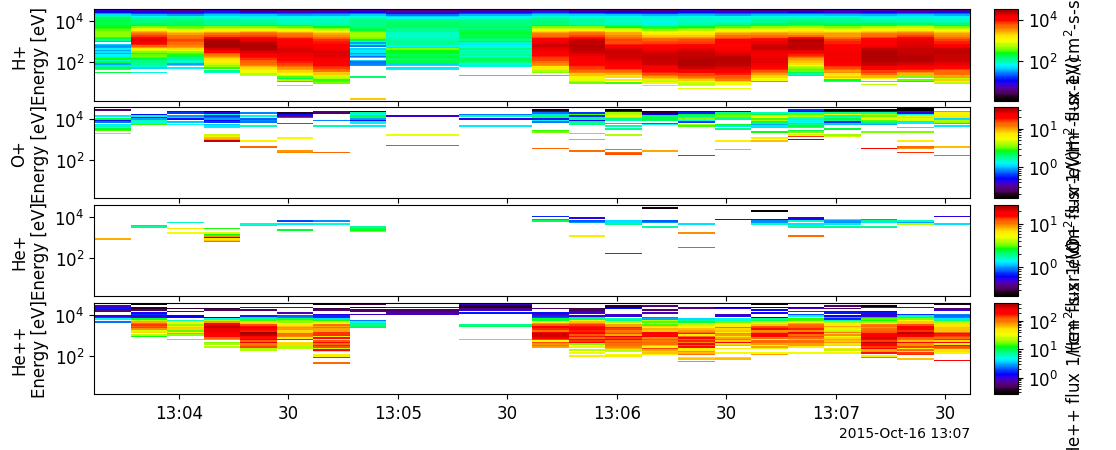

In [9]:
tplot(['mms1_hpca_hplus_flux_elev_0-360_spin', 
             'mms1_hpca_oplus_flux_elev_0-360_spin', 
             'mms1_hpca_heplus_flux_elev_0-360_spin', 
             'mms1_hpca_heplusplus_flux_elev_0-360_spin'])